### INTRODUCTION TO TENSORBOARD IN KERAS
![title](./pics/tensor-board-intro.png)

In [72]:
# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2
import os


# keras imports
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import imdb
from keras.datasets import mnist
from keras import backend as K
import keras

# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

## TRANING WITH MNIST DATA & TENSORBOARD

## MNIST DATA PREPARATION

In [73]:
# pre-processing initializations
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
print('Loading data...')
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # normalizing train images
x_test /= 255  # normalizing test images

y_ = y_train
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print ("after data preprocessing")
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape, "\n")
 
print("\nImdb review data lables\n")


print ("Before preprocessing")
print (y_[:10])
print ("\nAfter preprocessing(one hot encoded)")
print(y_train[:10])

Loading data...
after data preprocessing
input_train shape: (60000, 28, 28, 1)
input_test shape: (10000, 28, 28, 1) 


Imdb review data lables

Before preprocessing
[5 0 4 1 9 2 1 3 1 4]

After preprocessing(one hot encoded)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## WRITING TENSORBOARD CALLBACKS 

In [74]:
log_dir = './my_log_dir'
if not os.path.exists(log_dir):
    makedirs(log_dir)

!rm -f my_log_dir/*
# save class labels to disk to color data points in TensorBoard accordingly
with open(os.path.join(log_dir, 'metadata.tsv'), 'w') as f:
    np.savetxt(f, y_test)
tensorboard = keras.callbacks.TensorBoard(
                          log_dir=log_dir,
                          batch_size=batch_size,
                          #histogram_freq=1,
                          embeddings_freq=1,
                          embeddings_layer_names=['features'], # name of layer @toCalculateActivations
                          embeddings_metadata='metadata.tsv',
                          embeddings_data=x_test)

## TRAINING MODEL WITH TENSORBOARD CALLBACKS

In [8]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
print ("\n")

model.compile(loss=keras.losses.categorical_crossentropy,## WRITING TENSORBOARD CALLBACKS 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          callbacks=[tensorboard],
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
features (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)         

## VISUALIZE TENSORBOARD

### command to start tensor board server
```
tensorboard --logdir <path-to-log-directory>
```

##### ex. "tensorboard --logdir ./my_log_dir

### launching tensorboard dashboard

```
Go to default internet browser
open link "http://localhost:6006"
```

### Results

### Plots from tensorboard

Text(0.5, 1.0, "Final vector's cluster visualization")

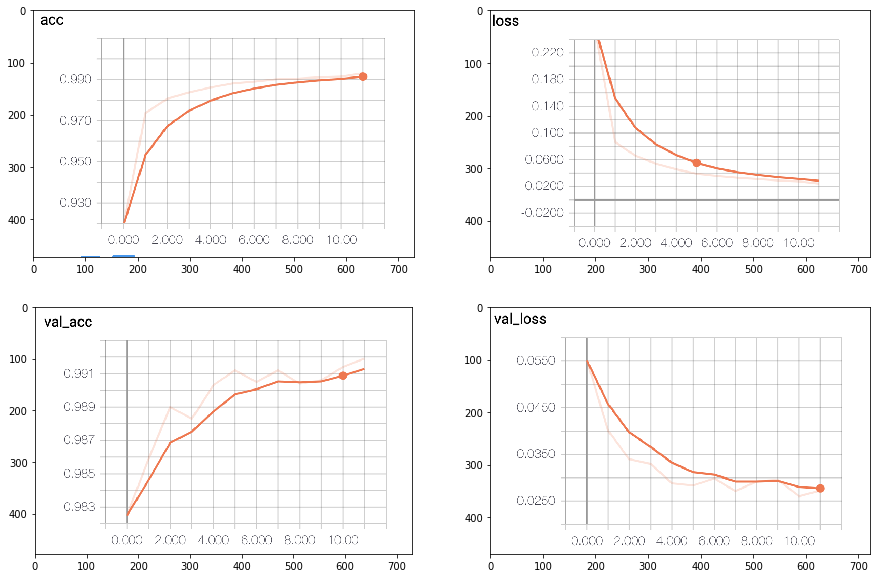

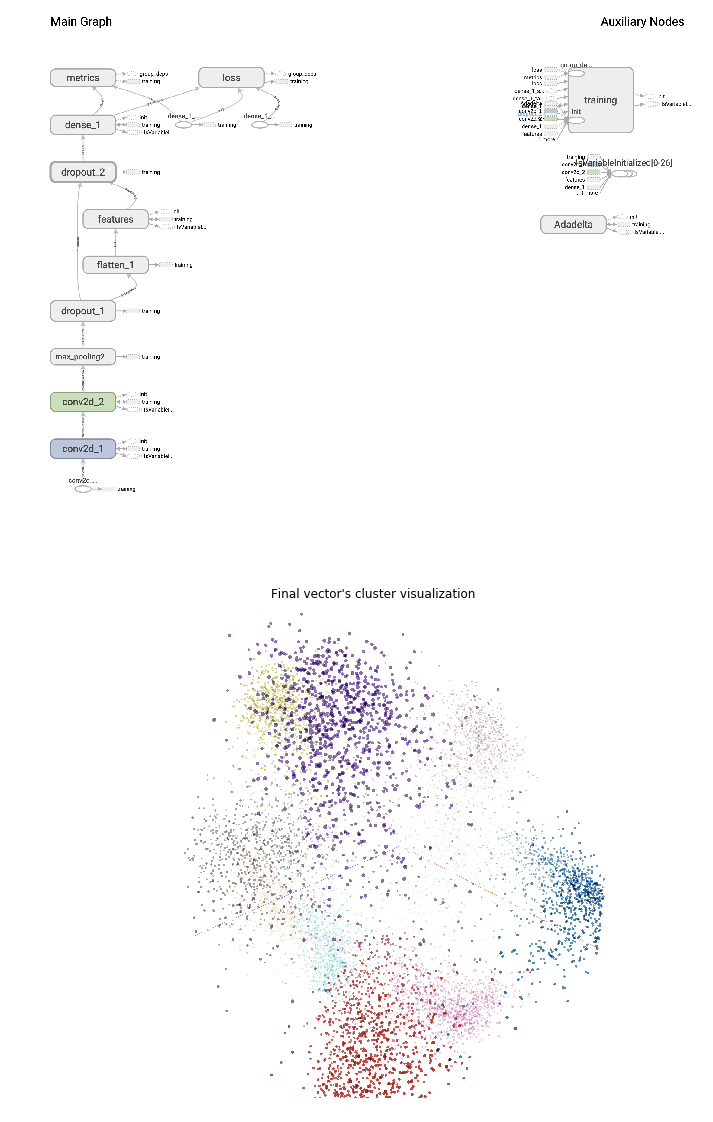

In [75]:
def read_image(path):
    return  cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)

display(Markdown("### Plots from tensorboard"))    

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(read_image("./pics/T1.png"))
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(read_image("./pics/T2.png"))
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(read_image("./pics/T3.png"))
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(read_image("./pics/T4.png"))

fig2 = plt.figure(figsize=(20,20))
ax21 = fig2.add_subplot(2,1,1)
ax21.imshow(read_image("./pics/T-graph.png"))
plt.axis('off')
ax22 = fig2.add_subplot(2,1,2)
ax22.imshow(read_image("./pics/T-E1.png"))
plt.axis('off')
plt.title("Final vector's cluster visualization")

In [3]:
display(Markdown("## USING IMDB DATA FOR MODEL TRAINING "))

# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 50  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data preparation was extensively cover in "text_pre-processing_basic model_building"(earlier module) ###

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# cutting sentences to max length of 50
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print ("after data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review 1 sample input data\n")
print(input_train[:1]) 

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 

"""
)

## USING IMDB DATA FOR MODEL TRAINING 

Loading data...
after data preprocessing
input_train shape: (25000, 50)
input_test shape: (25000, 50) 


Imdb review 1 sample input data

[[2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
    26  480    5  144   30 5535   18   51   36   28  224   92   25  104
     4  226   65   16   38 1334   88   12   16  283    5   16 4472  113
   103   32   15   16 5345   19  178   32]]

Imdb review data lables
[1 0]

Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 




## WRITING TENSORBOARD CALLBACKS 

In [4]:
callbacks_list = keras.callbacks.TensorBoard(
        # Log files will be written at this location
        # make sure that this folder is already present in training dir 
        # or change the path to concerned folder
        log_dir='my_log_dir',
        #We will record activation histograms every 1 epoch
        #histogram_freq=1,
        batch_size=128,
        embeddings_freq=1,
        embeddings_layer_names = ["embed"],
        embeddings_metadata='metadata.tsv',
        # We will record embedding data every 1 epoch
        #embeddings_freq=1,
        embeddings_data=input_test
)

log_dir = './my_log_dir'
if not os.path.exists(log_dir):
    makedirs(log_dir)

In [5]:
!rm -f my_log_dir/* # clear the tensorboard log folder
# save class labels to disk to color data points in TensorBoard accordingly
with open(os.path.join("my_log_dir", 'metadata.tsv'), 'w') as f:
    np.savetxt(f, y_test)

## TRAINING MODEL WITH TENSORBOARD CALLBACKS

In [ ]:
# model architecture and training
print("starting model training...")
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_features, 128, input_length=maxlen, name='embed'))
model.add(keras.layers.Conv1D(32, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(32, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[callbacks_list])

## VISUALIZE TENSORBOARD

### command to start tensor board server
```
tensorboard --logdir <path-to-log-directory>
```

##### ex. "tensorboard --logdir ./my_log_dir

### launching tensorboard dashboard

```
Go to default internet browser
open link "http://localhost:6006"
```

### Results